In [1]:
import tweepy

bearer_token = "AAAAAAAAAAAAAAAAAAAAAAhrjgEAAAAAtaINtJuJDU%2F%2BCdOGL3BFon0rYzo%3DRBGMBkpmeImGMYSEnM0Sa8F2mCwZlidarulMjtMOuKqla8aWCs" # Twitter API
client = tweepy.Client(bearer_token=bearer_token) # Twitter API v2 with OAuth2.0 Version

#let's request and paginate the tweets
query = 'context:152.825047692124442624 -is:retweet lang:en'

limit = 10000 #n of tweets to be requested


tweets = tweepy.Paginator(client.search_recent_tweets,
                          query=query,
                          expansions=['author_id'],
                          tweet_fields=['public_metrics'],
                          max_results=100).flatten(limit=limit)

In [2]:
#Let's create the panda dataframe
import pandas as pd

df_tweets = pd.DataFrame([tweet.data['text'],
                          tweet.data['public_metrics']['retweet_count'],
                          tweet.data['public_metrics']['like_count'],
                          tweet.data['author_id']
                         ] for tweet in tweets) # convert to pandas df

#Let's rename the columns
df_tweets.rename(columns={0: "text", 1: "retweet", 2: "likes", 3: "user_id"}, inplace=True)

display(df_tweets)

TooManyRequests: 429 Too Many Requests
Too Many Requests

In [ ]:
#getting the number of followers(we need to do a for loop because we can ask for up to 100 followers at the time)
user_list = list(df_tweets["user_id"])
followers = pd.DataFrame()
#print(user_list[(1-1)*100:1*100-1])
for i in range(0,limit//100):
    users = tweepy.Paginator(client.get_users, 
                                 ids=user_list[i*100:(i+1)*100],
                                 user_fields=['public_metrics']).flatten(limit=100)
    f = pd.DataFrame([user.data['public_metrics']['followers_count'] for user in users])
    followers = pd.concat([followers,f])
    
followers = followers.reset_index(drop=True)

#Let's add the column for the followers
df_tweets['followers'] = followers
display(df_tweets)

In [ ]:
'''
#getting the number of followers(we need to do a for loop because we can ask for up to 100 followers at the time)
user_list = list(df_tweets["user_id"])
followers = []
for i in range(1,limit//100):
    users = tweepy.Paginator(client.get_users, 
                                 ids=user_list[(i-1)*100:i*100],
                                 user_fields=['public_metrics']).flatten(limit=100)
    f = [user.data['public_metrics']['followers_count'] for user in users]
    followers.append(f)
    
print(followers)
    
#Let's add the column for the followers
#df_tweets['followers'] = followers
'''

In [ ]:
import os

path = os.getcwd()
df_tweets.to_csv(os.path.join(path,'Dataset1.csv'))#creates a csv file containing the tweets

In [10]:
import matplotlib.pyplot as plt

fl = df_tweets['followers']
lk = df_tweets['likes']
lim = 10000
plt.scatter(fl[0:lim], lk[0:lim])



KeyError: 'likes'

,Unnamed: 0,Text,Retweet,likes,user_id,followers
7767,7767,@AchmatX @ChefWay__ @tastemade @AnovaCulinary ...,0,0,1240235646918238209,694
3456,3456,@berenyi_miki @Cqaf @KEELEYsound looks like yo...,0,0,425007660,1358
628,628,@karenwhitefood2 @HessionV @Ruth_ITV @EstherWi...,0,1,2850321352,1422
2067,2067,@doofus74185 why just lunch? what about other ...,0,0,1193545652715671553,10950
5355,5355,Sanna Bhajji Recipe | Easy Recipe | Street foo...,1,2,1491845281176223744,1
...,...,...,...,...,...,...
8622,8622,@UkkoRestaurant @FeliciaMasemol1 lunch spot wh...,0,0,44110005,1090
7991,7991,"this is a lunch's menu, Boiled Fish🐟, severed ...",0,0,1430845714054008838,32
5553,5553,@MissKatieTexas @Hdporno22 Breakfast lunch and...,0,0,1568015673523163136,613
9759,9759,Korean food truck showcases sustainable food a...,0,0,358206653,1300


Text(0, 0.5, 'likes')

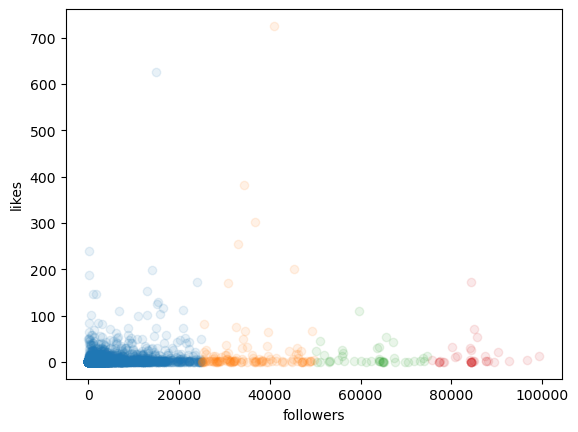

In [30]:
df_tweets = pd.read_csv('Dataset1.csv')
df_tweets.rename(columns={0: "text", 1: "retweet", "Likes": "likes", 3: "user_id"}, inplace=True)

tweets_1 = df_tweets[df_tweets['followers']<0.25e5]
tweets_2 = df_tweets[(df_tweets['followers']>=0.25e5) & (df_tweets['followers']<0.5e5)]
tweets_3 = df_tweets[(df_tweets['followers']>=0.5e5) & (df_tweets['followers']<0.75e5)]
tweets_4 = df_tweets[(df_tweets['followers']>=0.75e5) & (df_tweets['followers']<1e5)]

tweets_1 = tweets_1.sample(frac=1)
tweets_2 = tweets_2.sample(frac=1)
tweets_3 = tweets_3.sample(frac=1)
tweets_4 = tweets_4.sample(frac=1)


'''
tweets_1 = tweets_1[:100]
tweets_2 = tweets_2[:100]
tweets_3 = tweets_3[:100]
tweets_4 = tweets_4[:100]
'''

display(tweets_1)


plt.scatter(tweets_1['followers'], tweets_1['likes'], alpha=0.1)
plt.scatter(tweets_2['followers'], tweets_2['likes'], alpha=0.1)
plt.scatter(tweets_3['followers'], tweets_3['likes'], alpha=0.1)
plt.scatter(tweets_4['followers'], tweets_4['likes'], alpha=0.1)
plt.xlabel("followers")
plt.ylabel("likes")

#plt.ylim(0,20)


df_tweets = pd.read_csv('Dataset1.csv')
df_tweets.rename(columns={0: "text", 1: "retweet", "Likes": "likes", 3: "user_id"}, inplace=True)

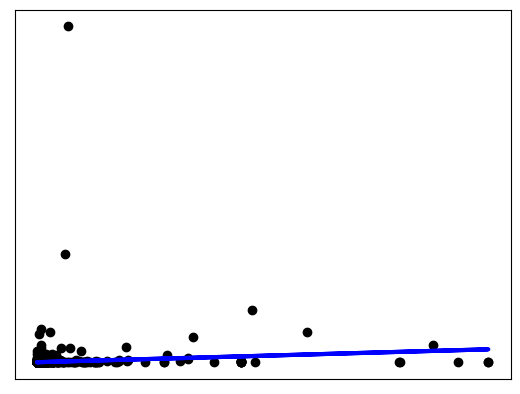

In [57]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

X = df_tweets['followers'].to_numpy().reshape(-1, 1)
y = df_tweets['likes']

reg.fit(X, y)

y_pred = reg.predict(X)

# Plot outputs
plt.scatter(X, y, color="black")
plt.plot(X, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

array([0.00000000e+00, 6.06896485e-05])

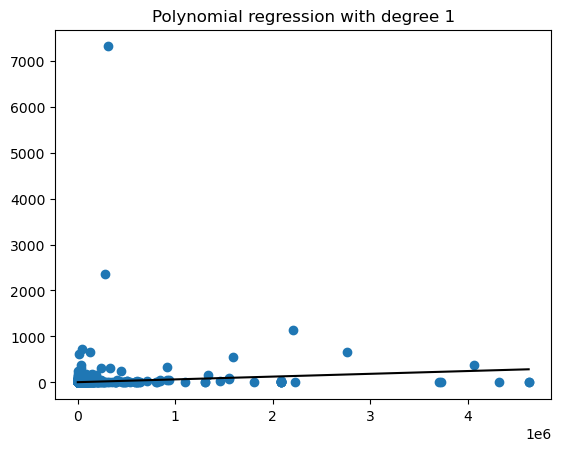

In [71]:
X = df_tweets['followers'].to_numpy().reshape(-1, 1)
y = df_tweets['likes']

X>

X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=1
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

display(polyreg[1].coef_)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [ ]:
0.25e5
0.25e5 0.5e5
0.5e5 0.75e5
0.75e5 1e5

In [131]:
import operator
df_tweets = pd.read_csv('Dataset1.csv')
df = df_tweets.rename(columns={"Text": "text", "Retweet": "retweet", "Likes": "likes", 3: "user_id"})
display(df)


print(df.groupby(df['followers'].between(1000, 10000)).count())
df = df.sort_values('followers')

ranges = []
max_followers = df.iloc[-1:,df.columns.get_loc('followers')]
bin_size = 10
bin_range = int(max_followers.values) / bin_size

for i in range(bin_size):
    start = int(i*bin_range)
    end = np.floor((i+1)*bin_range)
    display(end)
    ranges[i] = df.iloc[start:end,:]

for i in range(bin_size):
    tmp = ranges[i]
    plt.scatter(tmp['followers'], tmp['likes'], alpha=0.1)

,Unnamed: 0,text,retweet,likes,user_id,followers
0,0,"""Give me some chocolate!"" https://t.co/npAs3YY2t1",0,0,1352258459799007232,926
1,1,"“Packed lunch, work bag, a coffee with a lid. ...",0,0,300351572,4421
2,2,"@gtconway3d From ""world's best restaurant"" to ...",0,0,1613628938,182
3,3,@RupeeVon Gardener didn’t finish until 1pm\nLu...,0,0,247412907,49
4,4,Lunch served 😊..\nWhat are you having for lunc...,0,0,366263790,33633
...,...,...,...,...,...,...
9995,9995,@mygovassam @BCCI hope u give them passes too....,0,0,921202871948865536,60
9996,9996,@rosered_nz Shit https://t.co/2KGSGsSSDc,0,1,3221076978,359
9997,9997,Gurllll I ate made your daddy food for work ca...,0,0,2544710478,187
9998,9998,We have some lunch availability for our rearra...,0,0,48357749,5603


           Unnamed: 0  text  retweet  likes  user_id  followers
followers                                                      
False            7506  7506     7506   7506     7506       7506
True             2494  2494     2494   2494     2494       2494


462124.0

TypeError: cannot do positional indexing on Int64Index with these indexers [462124.0] of type float64